In [1]:
import DecisionTreeRegressor as dtr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

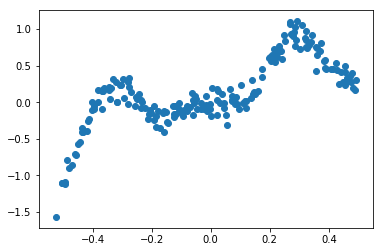

In [3]:
plt.scatter(x, y)

In [4]:
df = pd.DataFrame(data=x, columns=['x_data'])
df['output'] = pd.DataFrame(data=y)
df.head()

,x_data,output
0,-0.522342,-1.570394
1,-0.502279,-1.110851
2,-0.502296,-1.106334
3,-0.479913,-0.895815
4,-0.494357,-1.094119


In [5]:
tree = dtr.regression_tree_algorithm(df, min_samples=10, max_depth=3)
dtr.print_tree(tree)

    Is x_data <= 0.16624751833708645?
    --> True:
       Is x_data <= -0.41752456105237984?
       --> True:
          Is x_data <= -0.4646700857543169?
          --> True:
             =====Predict -1.0687829582334714
          --> False:
             =====Predict -0.4964591309484917
       --> False:
          Is x_data <= -0.2353571961780575?
          --> True:
             =====Predict 0.09083386919877455
          --> False:
             =====Predict -0.05294744638813647
    --> False:
       Is x_data <= 0.38808442059802845?
       --> True:
          Is x_data <= 0.2445600993913667?
          --> True:
             =====Predict 0.6192555891978723
          --> False:
             =====Predict 0.8380219840543044
       --> False:
          Is x_data <= 0.4306097845962874?
          --> True:
             =====Predict 0.4693580016097269
          --> False:
             =====Predict 0.315306364483277


In [6]:
dtr.calculate_error(df, tree)

0.14015770928744137

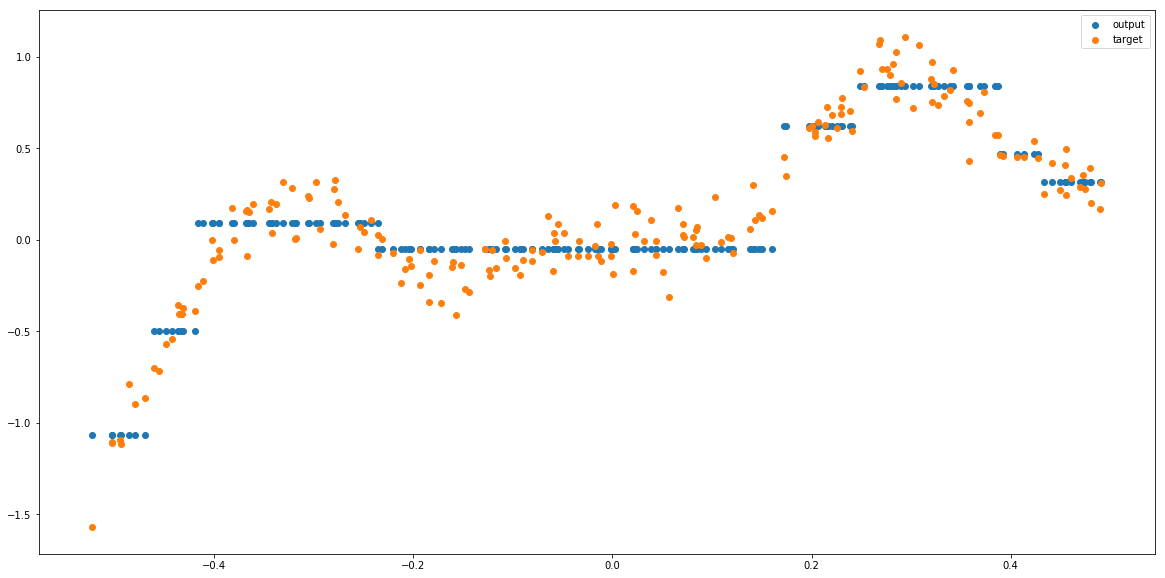

In [7]:
# tree = dtr.regression_tree_algorithm(df, min_samples=10, max_depth=3)
outputs = df.apply(dtr.predict_example, axis = 1, args=(tree,)).values
targets = df.output.values

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, outputs, label='output')
ax.scatter(x, targets, label='target')
ax.legend()

plt.show()

In [8]:
## Linear Regression
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
    c = (sy*sx2 - sx*sxy)/z
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

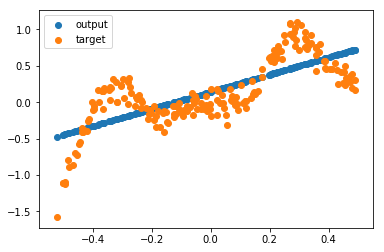

In [9]:
m,c = regression(x, y)
outputs = x*m+c
targets = y

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')
plt.legend()

plt.show()

In [10]:
dtr.get_potential_splits

def get_potential_splits(col):
    potential_splits = {}
        
    unique_values = np.unique(col)

    potential_splits= []
    for index in range(1, len(unique_values)):
            current_value = unique_values[index]
            previous_value = unique_values[index-1]

            potential_split = (current_value + previous_value)/2

            potential_splits.append(potential_split)
    return potential_splits

In [11]:
pot_splits = get_potential_splits(x)
x, pot_splits

(array([-0.52234211, -0.50227905, -0.50229587, -0.47991314, -0.49435746,
        -0.49388712, -0.48562713, -0.46895403, -0.44842267, -0.43130853,
        -0.41914321, -0.4362639 , -0.46038614, -0.43275944, -0.44277914,
        -0.43541879, -0.45506667, -0.41590592, -0.40228452, -0.41132786,
        -0.36691771, -0.39519042, -0.40080869, -0.39482996, -0.36106864,
        -0.38018441, -0.38191411, -0.36704331, -0.36800357, -0.36520508,
        -0.33817806, -0.31789012, -0.31863266, -0.34225205, -0.33041184,
        -0.34322501, -0.2979061 , -0.3447625 , -0.32150282, -0.27519251,
        -0.30511944, -0.27928509, -0.30573114, -0.29396904, -0.28059886,
        -0.27824457, -0.25581998, -0.24915399, -0.26895057, -0.25312588,
        -0.24235369, -0.23560417, -0.23511022, -0.22077894, -0.20838677,
        -0.21226299, -0.20477088, -0.23163286, -0.2018276 , -0.18470601,
        -0.17181482, -0.19356309, -0.12115444, -0.17896667, -0.19299862,
        -0.15245446, -0.16124108, -0.15972727, -0.1

In [12]:
def split_data(data, split_value):
#     print(type(data))
#     print(type(split_value))
#     print('IIIIIIIIIII')
    mask = data[:, 0]<= split_value
    data_below = data[mask]
    data_above = data[~mask]
    return data_below, data_above

In [13]:
# split_data(df.values, pot_splits[30])

In [1]:
def calculate_overall_error(data_below, data_above):
    m1, c1 = regression(data_below[:, 0], data_below[:, 1])
    m2, c2 = regression(data_above[:, 0], data_above[:, 1])    
    out1 = output(data_below[:, 0], m1, c1)
    out2 = output(data_above[:, 0], m2, c2)
    
    err1 = error(data_below[:, 1], out1)
    err2 = error(data_above[:, 1], out2)
    
    p = len(data_below)/(len(data_above)+ len(data_below))
    overall_error = p*err1 + (1-p)*err2
    return overall_error,  {'m1':m1, 'c1': c1, 'm2':m2, 'c2':c2 } #, 'e1':err1, 'e2':err2}

In [15]:
def determine_best_split(data, potential_splits):
    
    overall_err = 99999999
    best_split_value = potential_splits[0]
    vals = {}
    for value in potential_splits[:-1]:
        data_below, data_above = split_data(data, split_value=value)
        current_overall_error, val = calculate_overall_error(data_below, data_above)

        if current_overall_error <= overall_err:
            overall_err = current_overall_error
            best_split_value = value
            vals = val
    vals['error'] = overall_err
    return best_split_value, vals #, overall_sd

In [16]:
split_val, vals = determine_best_split(df.values, pot_splits)
print(split_val)
print(vals)

0.2445600993913667
{'m1': 1.1218920516802475, 'c1': 0.11515139789302074, 'm2': -3.378279280912334, 'c2': 1.893218232270607, 'error': 0.24193283670130222}


/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [17]:
dbel, dabo = split_data(df.values, split_val)

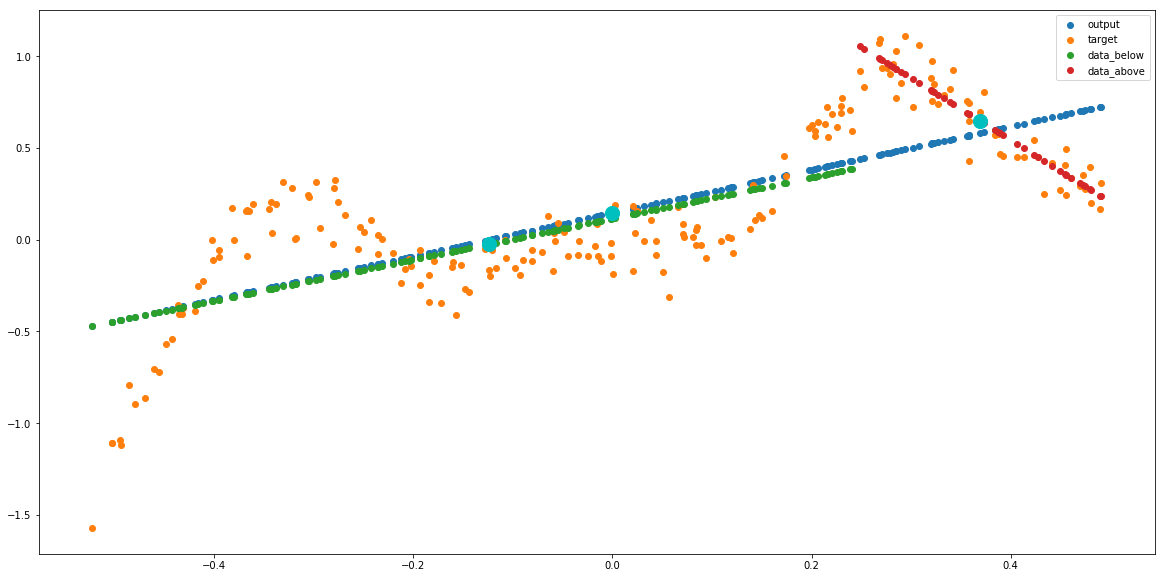

In [18]:
m,c = regression(x, y)
outputs = x*m+c
targets = y

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, outputs, label='output')
ax.scatter(x, targets, label='target')

m,c = regression(dbel[:,0], dbel[:,1])
outb = dbel[:,0]*m+c
ax.scatter(dbel[:,0], outb, label='data_below')

m,c = regression(dabo[:,0], dabo[:,1])
outa = dabo[:,0]*m+c
ax.scatter(dabo[:,0], outa, label='data_above')

ax.scatter(x.mean(), targets.mean(),s=200, c='c' , marker='o')
ax.scatter(dbel[:,0].mean(), outb.mean(),s=200, c='c' , marker='o')
ax.scatter(dabo[:,0].mean(), outa.mean(),s=200, c='c' , marker='o')


ax.legend()
plt.show()

In [19]:
class Question:

    def __init__(self, value):
        self.value = value
        
    def match(self, data):
        val = data
        return val <= self.value

    def __repr__(self):
        return "Is X <= %s?" % (str(self.value))

class Leaf:
    def __init__(self, m, c, data=None):
        self.slope = m
        self.intercept = c
        self.meanx = data[:,0].mean()
        self.meany = data[:,1].mean()
        self.min, self.max = data[:,0].min(),  data[:,0].max()
        
    def __repr__(self):
        return f"m:{self.slope} c:{self.intercept} meanx:{self.meanx}"
        
class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

def regression_tree_algorithm(data, min_samples=2, max_depth=15, prev_error = 999):
    
    # BASE_CASE

    if len(data)<=min_samples or max_depth == 0:
        m,c = regression(data[:,0], data[:, 1])
        return Leaf(m,c, data)
    
    #helper functions
    potential_splits = get_potential_splits(data[:,0])
#     print(len(potential_splits))
    split_value, vals = determine_best_split(data, potential_splits)
    data_below, data_above = split_data(data, split_value)
    if prev_error<= vals['error']:
        print(f'reverse error change: depth={max_depth} \n prev={prev_error} and new={vals["error"]}')
        m,c = regression(data[:,0], data[:, 1])
        return Leaf(m,c, data)
    
    if len(data_above) == 0 :
        return Leaf(vals['m1'], vals['c1'], data)
    elif len(data_below) == 0:
        return Leaf(vals['m2'], vals['c2'], data)
    
    
    
    
    # RECURSIVE_PART
    else:
        max_depth -=1
             
        #instantiate sub-tree
        question = Question(split_value)
        #find answers (recursion)
        yes_answer = regression_tree_algorithm(data_below,min_samples, max_depth, vals['error'])
        no_answer = regression_tree_algorithm(data_above,min_samples, max_depth, vals['error'])
        
        if isinstance(yes_answer, Leaf) and isinstance(no_answer, Leaf):
            if yes_answer.slope == no_answer.slope and yes_answer.intercept == no_answer.intercept:
                return yes_answer
        
        return Decision_Node(question, yes_answer, no_answer)

In [20]:
tree = regression_tree_algorithm(df.values, min_samples=20, max_depth=5)

reverse error change: depth=2 
 prev=0.09396873544358994 and new=0.10034605018939816
reverse error change: depth=2 
 prev=0.09651616297333238 and new=0.10170537022806414


/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [21]:
def print_tree(node, spacing="    "):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing +'====='+ f"m={node.slope}  ,c={node.intercept}")
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "   ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "   ")

In [22]:
print_tree(tree)

    Is X <= 0.2445600993913667?
    --> True:
       Is X <= -0.26238527653317767?
       --> True:
          Is X <= -0.38104926063692324?
          --> True:
             Is X <= -0.4983182556599132?
             --> True:
                =====m=23.027030400168687  ,c=10.457595360436553
             --> False:
                Is X <= -0.4827701358647908?
                --> True:
                   =====m=36.822701706897156  ,c=17.089862503637093
                --> False:
                   =====m=10.593913917033351  ,c=4.1615300690000865
          --> False:
             =====m=0.9907160557791153  ,c=0.4754836741904339
       --> False:
          Is X <= 0.16624751833708645?
          --> True:
             Is X <= -0.13584282389959854?
             --> True:
                Is X <= -0.15460626620624057?
                --> True:
                   =====m=-3.2989902724971687  ,c=-0.8039576658371383
                --> False:
                   =====m=-17.794931478782992  ,c=-2.8652

In [23]:
def predict_example(example, tree):
    if isinstance(tree, Leaf):
#         print(str(tree))
        return tree.slope * example['x_data'] + tree.intercept
    
    if tree.question.match(example['x_data']):
        return predict_example(example, tree.true_branch)
    else:
        return predict_example(example, tree.false_branch)

In [24]:
example = df.iloc[6]
example

x_data   -0.485627
output   -0.791125
Name: 6, dtype: float64

In [25]:
predict_example(example, tree)

-0.7922405426240324

In [26]:
outputs = df.apply(predict_example, axis = 1, args=(tree,)).values
outputs

array([-1.57039218e+00, -1.10839957e+00, -1.10878692e+00, -9.22628414e-01,
       -1.11371488e+00, -1.09639543e+00, -7.92240543e-01, -8.06528525e-01,
       -5.89021080e-01, -4.07715366e-01, -2.78836967e-01, -4.60212102e-01,
       -7.15761113e-01, -4.23086223e-01, -5.29233990e-01, -4.51259122e-01,
       -6.59407083e-01, -2.44541411e-01, -1.00237515e-01, -1.96041835e-01,
        1.11972407e-01, -2.50832111e-02, -8.46026731e-02, -2.12645241e-02,
        1.17767178e-01,  9.88288764e-02,  1.15564836e-01,  1.11847974e-01,
        1.10896629e-01,  1.13669137e-01,  1.40445243e-01,  1.60544827e-01,
        1.59809178e-01,  1.36409075e-01,  1.48139356e-01,  1.35445150e-01,
        1.80343318e-01,  1.33921926e-01,  1.56965670e-01,  2.02846033e-01,
        1.73196951e-01,  1.98791448e-01,  1.72590930e-01,  1.84243825e-01,
        1.97489874e-01,  1.99822315e-01,  3.99899575e-02,  1.79989335e-02,
        2.09030023e-01,  3.11021417e-02, -4.43521367e-03, -2.67017993e-02,
       -2.83313309e-02, -

In [27]:
def get_mean_from_leaf(tree):
    mean_x = []
    mean_y = []
    if isinstance(tree, Leaf):
        return [tree.meanx], [tree.meany]
    
    mxt, myt = get_mean_from_leaf(tree.true_branch)
    mxf, myf =get_mean_from_leaf(tree.false_branch)
    mean_x = mxt + mxf
    mean_y = myt + myf
    return mean_x, mean_y

In [28]:
meanx, meany = get_mean_from_leaf(tree)

/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


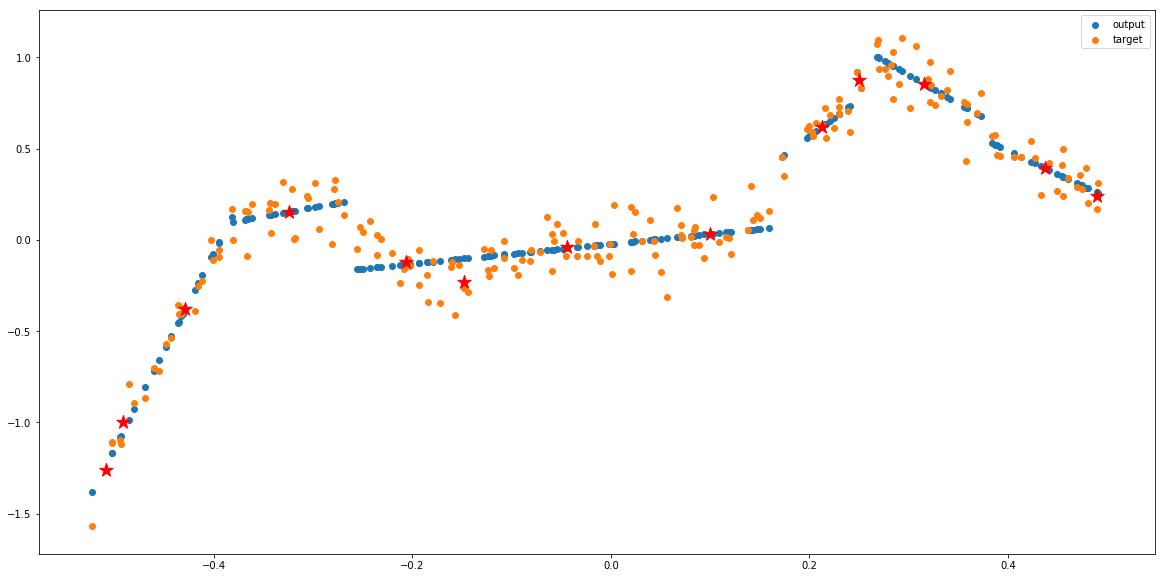

In [29]:
tree = regression_tree_algorithm(df.values, min_samples=20, max_depth=3)
outputs = df.apply(predict_example, axis = 1, args=(tree,)).values
targets = y

fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, outputs, label='output')
ax.scatter(x, targets, label='target')

ax.scatter(meanx, meany, s=200, c='r', marker='*')


ax.legend()
plt.show()

In [30]:
def get_leafs(tree):
    leaf_list = []
    if isinstance(tree, Leaf):
        return [tree]
    
    leaft = get_leafs(tree.true_branch)
    leaff = get_leafs(tree.false_branch)
    leaf_list = leaft + leaff
    return leaf_list

In [31]:
leafs = get_leafs(tree)
type(leafs)

list

In [32]:
leafs.sort(key=lambda leaf: leaf.meanx)

In [33]:
leafs

[m:10.726423848134836 c:4.22197291245495 meanx:-0.44639441096641036,
 m:0.9907160557791153 c:0.4754836741904339 meanx:-0.32392500445211253,
 m:0.5444254998464342 c:-0.02189000071105758 meanx:-0.047214374871302374,
 m:4.084069113666264 c:-0.25010259571052856 meanx:0.21286568878066014,
 m:-22.13984442980317 c:6.423721917311499 meanx:0.25053066862291423,
 m:-3.098534665536416 c:1.8334150627683412 meanx:0.3156114745440268,
 m:-2.566230366868478 c:1.5157940759872452 meanx:0.4423348366903161]